In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top1000youtubers/youtubers_df.csv


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
file_path = '/kaggle/input/top1000youtubers/youtubers_df.csv' 
youtubers_df = pd.read_csv(file_path)


In [13]:
youtubers_df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,253500000.0,India,111300.0,3200.0,120.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",210100000.0,Estados Unidos,95400000.0,5400000.0,16600.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,168100000.0,Unknown,4100000.0,21600.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,165400000.0,India,23300.0,239.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",116500000.0,Unknown,4100000.0,8800.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [14]:
youtubers_df.shape

(1000, 9)

In [15]:
youtubers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   object 
 1   Username    1000 non-null   object 
 2   Categories  676 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), object(5)
memory usage: 70.4+ KB


In [16]:
youtubers_df.describe()

,Suscribers,Visits,Likes,Comments
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,2.260980e+07,1.063825e+06,4.917148e+04,1866.295000
std,1.733998e+07,3.729356e+06,2.107156e+05,20503.291953
min,1.230000e+07,0.000000e+00,0.000000e+00,0.000000
25%,1.430000e+07,3.310000e+04,4.792500e+02,3.000000
50%,1.730000e+07,1.932000e+05,3.400000e+03,70.000000
75%,2.442500e+07,8.844500e+05,3.080000e+04,458.250000
max,2.535000e+08,9.540000e+07,5.400000e+06,532000.000000


In [17]:
youtubers_df.describe()

,Suscribers,Visits,Likes,Comments
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,2.260980e+07,1.063825e+06,4.917148e+04,1866.295000
std,1.733998e+07,3.729356e+06,2.107156e+05,20503.291953
min,1.230000e+07,0.000000e+00,0.000000e+00,0.000000
25%,1.430000e+07,3.310000e+04,4.792500e+02,3.000000
50%,1.730000e+07,1.932000e+05,3.400000e+03,70.000000
75%,2.442500e+07,8.844500e+05,3.080000e+04,458.250000
max,2.535000e+08,9.540000e+07,5.400000e+06,532000.000000


In [18]:
youtubers_df.duplicated().sum()

0

In [20]:
youtubers_df['Categories'].fillna('Unknown', inplace=True)


In [21]:

youtubers_df.isnull().sum()

Rank          0
Username      0
Categories    0
Suscribers    0
Country       0
Visits        0
Likes         0
Comments      0
Links         0
dtype: int64

In [22]:
youtubers_df['Rank'] = pd.to_numeric(youtubers_df['Rank'], errors='coerce')

In [23]:
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

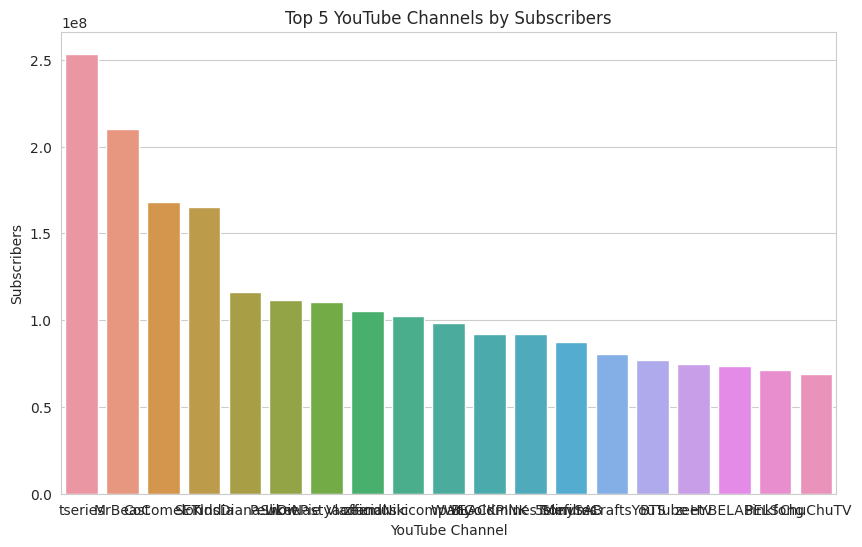

In [34]:
# Bar Chart of Top 5 Channels by Subscribers
top_5_subscribers = youtubers_df.sort_values(by='Suscribers', ascending=False).head(19)
plt.figure(figsize=(10, 6))
sns.barplot(x='Username', y='Suscribers', data=top_5_subscribers)
plt.title('Top 5 YouTube Channels by Subscribers')
plt.xlabel('YouTube Channel')
plt.ylabel('Subscribers')
plt.show()

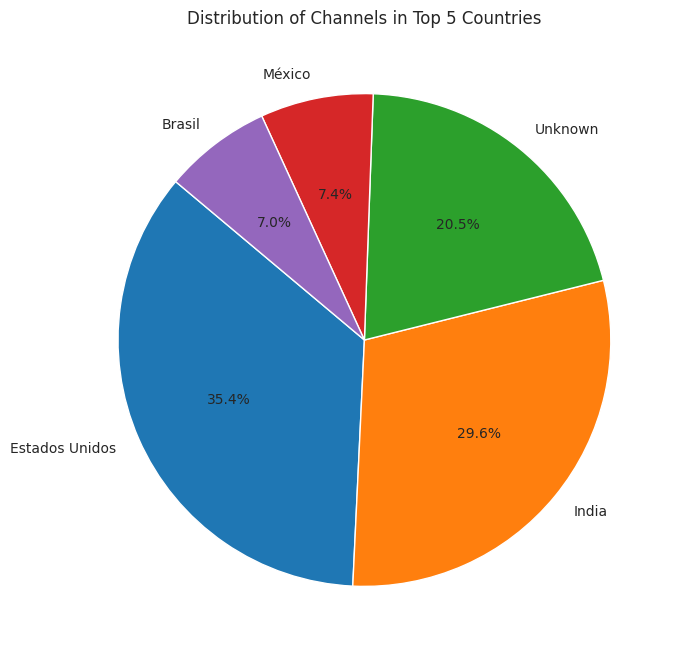

In [33]:
# Pie Chart of Channel Distribution in Different Countries
top_countries = youtubers_df['Country'].value_counts().head(5)  # Top 10 countries
plt.figure(figsize=(10, 8))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Channels in Top 5 Countries')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


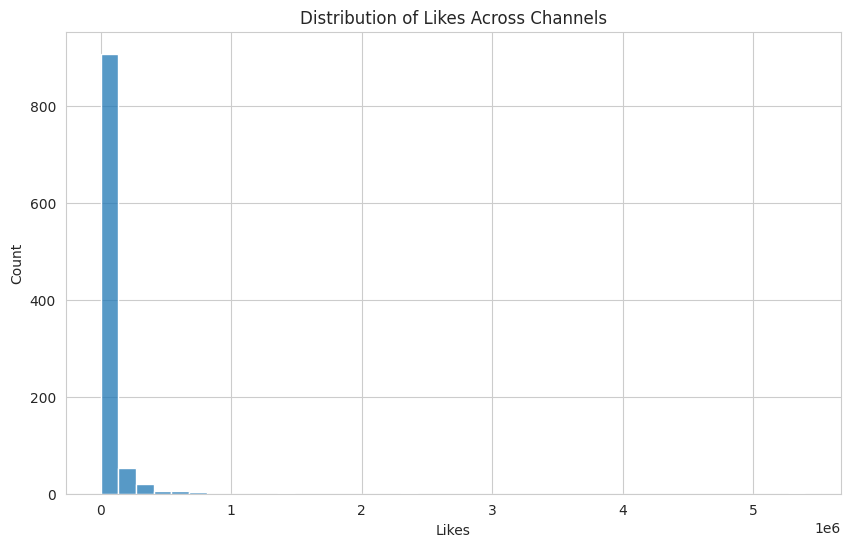

In [30]:
# Histogram of Likes
plt.figure(figsize=(10, 6))
sns.histplot(youtubers_df['Likes'], bins=40, kde=False)
plt.title('Distribution of Likes Across Channels')
plt.xlabel('Likes')
plt.show()

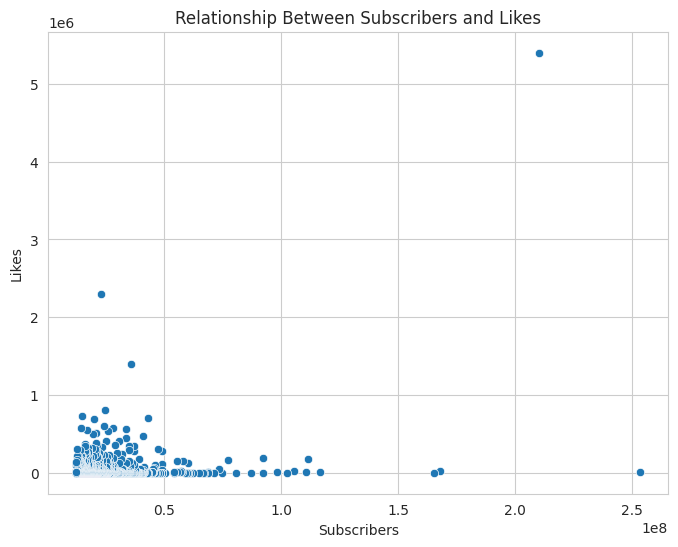

In [28]:
# Scatter Plot of Subscribers vs Likes
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Suscribers', y='Likes', data=youtubers_df)
plt.title('Relationship Between Subscribers and Likes')
plt.xlabel('Subscribers')
plt.ylabel('Likes')
plt.show()